## Multi-label classification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *

In [3]:
PATH = 'data/imaterialist/'

In [14]:
def createImageCSV(_dataset):
    fn ='data/imaterialist/'+_dataset+'.json'
    outfn='data/imaterialist/'+_dataset+'.csv'
    f = open(fn, 'r') 
    outf  = open(outfn, 'w') 
    data = json.load(f)
    ano =  data["annotations"]
    for ano in data["annotations"]:
        imageId = ano["imageId"]
        labelId = ano["labelId"]
        outf.write(imageId + ".jpg," + ' '.join(labelId)+'\n')
    f.close
    outf.close
createImageCSV('train')
createImageCSV('validation')


## Multi-label classification

In [4]:
from fastai.plots import *

In multi-label classification each sample can belong to one or more clases.

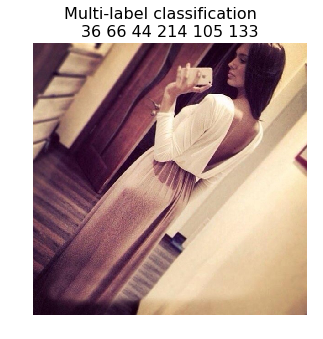

In [21]:
fn = f'{PATH}train.csv'
df = pd.read_csv(fn, index_col=0, header=0, dtype=str)
fnames = df.index.values
titles =[df.iloc[0,0]]
list_paths = [f"{PATH}train/"+fnames[0]]
plots_from_files(list_paths, titles=titles, maintitle="Multi-label classification")


## Multi-label models for iMaterialist dataset

In [22]:
from planet import f2

metrics=[f2]
f_model = resnet34

In [26]:
label_csv = f'{PATH}train.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)


We use a different set of data augmentations for this dataset - we also allow vertical flips, since we don't expect vertical orientation of satellite images to change our classifications.

In [27]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train', label_csv, tfms=tfms,
                     val_idxs=val_idxs, test_name='test')

In [28]:
data = get_data(299)

In [38]:
fn = f'{PATH}'+data.trn_ds.fnames[0];fn


'data/imaterialist/train/100.jpg'

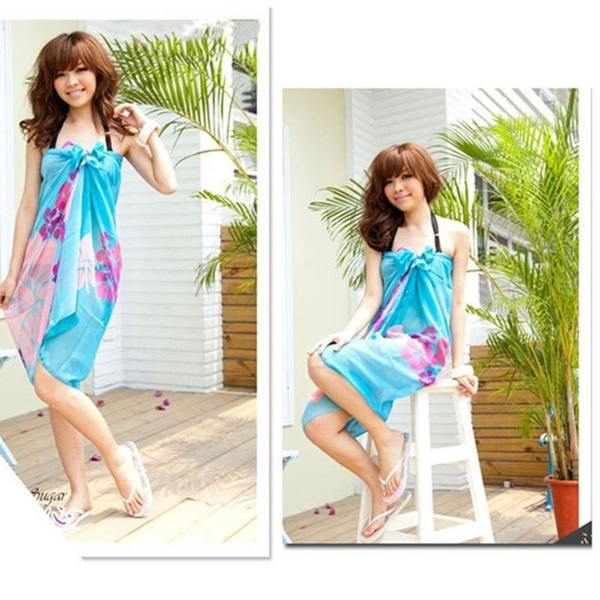

In [39]:
img = PIL.Image.open(fn);img

In [21]:
img.size

(600, 600)

In [22]:
size_d={k:PIL.Image.open(PATH + k).size for k in data.trn_ds.fnames}

In [23]:
row_sz,col_sz=list(zip(*size_d.values()))

In [24]:
row_sz=np.array(row_sz);col_sz=np.array(col_sz)

In [25]:
row_sz[:5]

array([600, 431, 600, 600, 300])

(array([   202.,    586.,   1404.,   7111.,  22302.,  24115.,  92195.,  67147.,  62318., 534255.]),
 array([ 27. ,  84.3, 141.6, 198.9, 256.2, 313.5, 370.8, 428.1, 485.4, 542.7, 600. ]),
 <a list of 10 Patch objects>)

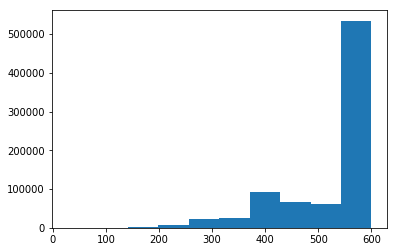

In [26]:
plt.hist(row_sz)

(array([   198.,    415.,    949.,   2331.,  15483.,  11813.,  58487.,  40429.,  63691., 617839.]),
 array([ 32. ,  88.8, 145.6, 202.4, 259.2, 316. , 372.8, 429.6, 486.4, 543.2, 600. ]),
 <a list of 10 Patch objects>)

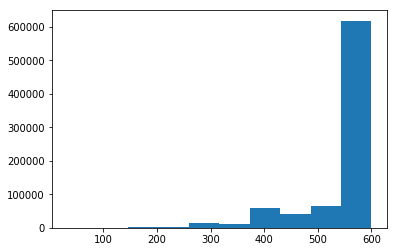

In [27]:
plt.hist(col_sz)

In [40]:
x,y = next(iter(data.val_dl))

In [41]:
y.shape

torch.Size([64, 228])

In [42]:
list(zip(data.classes, y[0]))

[('1', 0.0),
 ('10', 0.0),
 ('100', 0.0),
 ('101', 0.0),
 ('102', 0.0),
 ('103', 0.0),
 ('104', 0.0),
 ('105', 1.0),
 ('106', 0.0),
 ('107', 0.0),
 ('108', 0.0),
 ('109', 0.0),
 ('11', 0.0),
 ('110', 0.0),
 ('111', 0.0),
 ('112', 0.0),
 ('113', 0.0),
 ('114', 0.0),
 ('115', 0.0),
 ('116', 0.0),
 ('117', 0.0),
 ('118', 0.0),
 ('119', 0.0),
 ('12', 0.0),
 ('120', 0.0),
 ('121', 0.0),
 ('122', 0.0),
 ('123', 0.0),
 ('124', 0.0),
 ('125', 0.0),
 ('126', 0.0),
 ('127', 0.0),
 ('128', 0.0),
 ('129', 0.0),
 ('13', 0.0),
 ('130', 0.0),
 ('131', 0.0),
 ('132', 0.0),
 ('133', 0.0),
 ('134', 0.0),
 ('135', 0.0),
 ('136', 0.0),
 ('137', 0.0),
 ('138', 0.0),
 ('139', 0.0),
 ('14', 0.0),
 ('140', 0.0),
 ('141', 0.0),
 ('142', 0.0),
 ('143', 0.0),
 ('144', 0.0),
 ('145', 0.0),
 ('146', 0.0),
 ('147', 0.0),
 ('148', 0.0),
 ('149', 0.0),
 ('15', 0.0),
 ('150', 0.0),
 ('151', 1.0),
 ('152', 0.0),
 ('153', 0.0),
 ('154', 0.0),
 ('155', 0.0),
 ('156', 0.0),
 ('157', 0.0),
 ('158', 0.0),
 ('159', 0.0),
 ('

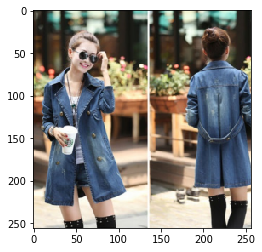

In [31]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]);

In [13]:
sz=64

In [16]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)

epoch      trn_loss   val_loss   f2                               
    0      0.075449   0.072824   0.444507  



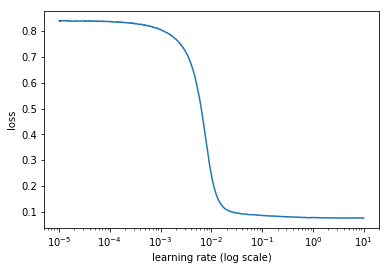

In [17]:
lrf=learn.lr_find()
learn.sched.plot()

In [19]:
lr = 0.015